# Importing Packages

In [ ]:
!pip install aisdc

In [1]:
import os
import sys
import pylab as plt
import numpy as np
import logging
import importlib
import argparse
import json
import pickle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from os.path import expanduser
from aisdc.safemodel.classifiers import SafeSVC
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.impute import KNNImputer
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_privacy as tf_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from aisdc.safemodel.classifiers import SafeKerasModel
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_privacy as tf_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

from aisdc.attacks.attack_report_formatter import (  # pylint: disable=import-error
    GenerateTextReport,
)
from aisdc.attacks.likelihood_attack import LIRAAttack  # pylint: disable=import-error
from aisdc.attacks.target import Target  # pylint: disable=import-error
from aisdc.attacks.worst_case_attack import (  # pylint: disable=import-error
    WorstCaseAttack,
)


from art.attacks.inference.membership_inference import MembershipInferenceBlackBoxRuleBased
from art.estimators.classification.scikitlearn import ScikitlearnSVC
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox
from art.metrics.privacy.worst_case_mia_score import get_roc_for_fpr
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


INFO:art.config:set ART_DATA_PATH to C:\Users\alieyeh.moghaddam\.art\data


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data preperation

## Loading data

In [117]:
# synthetic data
data = pd.read_csv('C:/Users/alieyeh.moghaddam/Desktop/ADNI/synthetic_data89%.csv')
# common columns
cc = pd.read_csv('cc.csv')
# test data
test = pd.read_csv('C:/Users/alieyeh.moghaddam/Desktop/ADNI/ADNI_test_volumes.tsv')

In [119]:
test

,Unnamed: 0,Unnamed: 0.1,participant_id,session_id,diagnosis,age,edu,hippocampus_vol,brain_vol,entorhinal_vol,...,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,eTIV
0,0,0,sub-ADNI051S1296,ses-M00,AD,77.0,12.0,6558.0,1027600.0,2186.0,...,11670.0,17571.0,10350.0,7492.0,7000.0,1114.0,2109.0,597.0,6441.0,1.617070e+06
1,1,1,sub-ADNI051S1296,ses-M06,AD,77.5,12.5,6298.0,1019190.0,2261.0,...,11311.0,16675.0,10596.0,8135.0,6639.0,823.0,1515.0,531.0,6200.0,1.622668e+06
2,2,2,sub-ADNI051S1296,ses-M12,AD,78.0,13.0,6080.0,1021800.0,2377.0,...,12071.0,16941.0,10710.0,8236.0,6951.0,966.0,1782.0,533.0,6121.0,1.615075e+06
3,3,3,sub-ADNI051S1296,ses-M24,AD,79.0,14.0,6047.0,997904.0,2485.0,...,11787.0,17102.0,9890.0,7463.0,6865.0,1058.0,2367.0,549.0,6565.0,1.608315e+06
4,4,4,sub-ADNI141S1137,ses-M00,AD,81.5,18.0,4988.0,800230.0,2452.0,...,8694.0,14547.0,9902.0,7688.0,7545.0,919.0,2018.0,736.0,6231.0,1.315308e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,292,sub-ADNI136S0186,ses-M06,CN,81.0,16.5,7475.0,990479.0,3652.0,...,12242.0,16947.0,9348.0,9110.0,8106.0,1221.0,2535.0,507.0,5703.0,1.615824e+06
293,293,293,sub-ADNI136S0186,ses-M12,CN,81.5,17.0,7913.0,1025370.0,3931.0,...,12481.0,17576.0,9314.0,9547.0,8461.0,1200.0,2405.0,595.0,5778.0,1.594623e+06
294,294,294,sub-ADNI136S0186,ses-M24,CN,82.5,18.0,7677.0,1014580.0,3622.0,...,12284.0,17059.0,8719.0,9434.0,8327.0,1190.0,2064.0,637.0,6343.0,1.598043e+06
295,295,295,sub-ADNI136S0186,ses-M36,CN,83.5,19.0,7671.0,1013480.0,3856.0,...,12659.0,17084.0,9283.0,9547.0,8314.0,1002.0,2059.0,608.0,5762.0,1.620273e+06


## Cleaning data

In [120]:
# numerical mapping for test data
diagnosis_mapping = {'MCI': 2, 'CN': 0, 'AD': 1}
test['diagnosis'] = test['diagnosis'].map(diagnosis_mapping)
test = test[(test['diagnosis'] == 0) | (test['diagnosis'] == 1)]

In [121]:
# making sure they have the same features
common_columns = set(data.columns).intersection(set(cc.columns))
data = data[common_columns]
test = test[common_columns]

In [122]:
# Imputing missing values using KNN
data = data.replace([np.inf, -np.inf], np.nan)
imputer = KNNImputer(n_neighbors=3)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

## Split data

In [132]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 
X_train = X
y_train = y
Xtest = test.drop(columns=['diagnosis'])
ytest = test['diagnosis']

In [100]:
y_test 

520    0.0
181    1.0
3      0.0
620    1.0
653    1.0
      ... 
975    0.0
902    0.0
512    0.0
518    0.0
876    0.0
Name: diagnosis, Length: 218, dtype: float64

## Normalising data

In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Xtest_scaled = scaler.transform(Xtest)

### Set Seed

In [52]:
SEED = 12345

# Baseline Models

## SVM Model

### SVM Hyperparameter Optimisation

In [44]:
svm = SVC()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'probability': [True]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='f1',verbose=2, error_score='raise')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END C=0.1, gamma=0.001, kernel=linear, probability=True; total time=   0.5s
[CV] END C=0.1, gamma=0.001, kernel=linear, probability=True; total time=   0.4s
[CV] END C=0.1, gamma=0.001, kernel=linear, probability=True; total time=   0.3s
[CV] END C=0.1, gamma=0.001, kernel=linear, probability=True; total time=   0.2s
[CV] END C=0.1, gamma=0.001, kernel=linear, probability=True; total time=   0.2s
[CV] END ..C=0.1, gamma=0.001, kernel=poly, probability=True; total time=   0.2s
[CV] END ..C=0.1, gamma=0.001, kernel=poly, probability=True; total time=   0.2s
[CV] END ..C=0.1, gamma=0.001, kernel=poly, probability=True; total time=   0.2s
[CV] END ..C=0.1, gamma=0.001, kernel=poly, probability=True; total time=   0.1s
[CV] END ..C=0.1, gamma=0.001, kernel=poly, probability=True; total time=   0.2s
[CV] END ...C=0.1, gamma=0.001, kernel=rbf, probability=True; total time=   0.3s
[CV] END ...C=0.1, gamma=0.001, kernel=rbf, pro

In [45]:
print(best_params)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}


In [46]:
print(best_score)

0.7190714446702818


### Final SVM Model & Evaluation

In [134]:
clf = SVC(kernel='rbf', gamma='scale', C=10, probability=True)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(Xtest_scaled)

In [135]:
accuracy = accuracy_score(ytest, predictions)
print(f"Accuracy: {accuracy}")
f1 = f1_score(ytest, predictions)
print(f"F1-Score: {f1}")

Accuracy: 0.478494623655914
F1-Score: 0.0


In [136]:
conf_matrix = confusion_matrix(ytest, predictions)
conf_matrix

array([[89,  0],
       [97,  0]], dtype=int64)

### attacks

In [66]:
directory = "./SVM_unsafe_87synth"

# Get original data
X_train_scaled = np.loadtxt('x_train.txt')
X_test_scaled = np.loadtxt('x_test.txt')
y_train = np.loadtxt('y_train.txt')
y_test = np.loadtxt('y_test.txt')

print("Saving training/testing data to " + directory)
np.savetxt(os.path.join(directory, "x_train.txt"), X_train_scaled, fmt="%d")
np.savetxt(os.path.join(directory, "y_train.txt"), y_train, fmt="%d")
np.savetxt(os.path.join(directory, "x_test.txt"), X_test_scaled, fmt="%d")
np.savetxt(os.path.join(directory, "y_test.txt"), y_test, fmt="%d")

Saving training/testing data to ./SVM_unsafe_87synth


In [67]:
filename = os.path.join(directory, "model.pkl")
print("Saving model to " + filename)
with open(filename, "wb") as file:
    pickle.dump(clf, file)

Saving model to ./SVM_unsafe_87synth\model.pkl


### Attack

In [69]:
def generate_report(directory, target_model, x_train, y_train,
                                             x_test, y_test, 
                    attack_output_name, target_filename, outfile,):  # pylint: disable=too-many-arguments, disable=too-many-locals
    """Generate report based on target model."""

    print()
    print("Acting as TRE...")
    print()

    if not os.path.exists(directory):
        os.makedirs(directory)

    # Suppress messages from AI-SDC -- comment out these lines to
    # see all the aisdc logging statements
    logging.getLogger("attack-reps").setLevel(logging.WARNING)
    logging.getLogger("prep-attack-data").setLevel(logging.WARNING)
    logging.getLogger("attack-from-preds").setLevel(logging.WARNING)

    # Read the model to be released as supplied by the researcher
    model_filename = os.path.join(directory, target_model)
    print("Reading target model from " + model_filename)
    with open(model_filename, "rb") as file:
        target_model = pickle.load(file)

    # Read the training/testing data as supplied by the researcher
    print("Reading training/testing data from " + directory)
    train_x = np.loadtxt(os.path.join(directory, x_train))
    train_y = np.loadtxt(os.path.join(directory, y_train))
    test_x = np.loadtxt(os.path.join(directory, x_test))
    test_y = np.loadtxt(os.path.join(directory, y_test))

    # Wrap the training and test data into the Target object
    target = Target(model=target_model)
    target.add_processed_data(train_x, train_y, test_x, test_y)

    # Run the attack
    wca = WorstCaseAttack(
        n_dummy_reps=10, output_dir=directory, report_name=attack_output_name
    )
    wca.attack(target)

    _ = wca.make_report()

    # Define a configuration file for the attacks to be run
    lira_config = {
        "training_data_filename": "train_data.csv",
        "test_data_filename": "test_data.csv",
        "training_preds_filename": "train_preds.csv",
        "test_preds_filename": "test_preds.csv",
        "target_model": ["sklearn.svm"],
        "target_model_hyp": {"C": 10, "gamma": 'scale'},
    }

    with open(
        os.path.join(directory, "lira_config.json"), "w", encoding="utf-8"
    ) as file:
        file.write(json.dumps(lira_config))

    # Run the LIRA attack to test disclosure risk
    lira_attack_obj = LIRAAttack(
        n_shadow_models=100,
        attack_config_json_file_name=os.path.join(directory, "lira_config.json"),
        output_dir=directory,
        report_name=attack_output_name,
    )

    lira_attack_obj.attack(target)
    _ = lira_attack_obj.make_report()

    target.save(os.path.join(directory, "target"))

    text_report = GenerateTextReport()
    text_report.process_attack_target_json(
        os.path.join(directory, attack_output_name) + ".json",
        target_filename=os.path.join(directory, "target", target_filename),
    )

    text_report.export_to_file(
        output_filename=os.path.join(directory, outfile),
        move_files=True,
        model_filename=model_filename,
    )

    print("Results written to " + os.path.join(directory, outfile))

In [70]:
def run_user_story(release_config: dict):
    """Main method to parse arguments and then invoke report generation."""

    generate_report(
        release_config["training_artefacts_dir"],
        release_config["target_model"],
        release_config["x_train_path"],
        release_config["y_train_path"],
        release_config["x_test_path"],
        release_config["y_test_path"],
        release_config["attack_output_name"],
        release_config["target_results"],
        release_config["outfile"],
    )


Acting as TRE...

Reading target model from ./SVM_unsafe_87synth\model.pkl
Reading training/testing data from ./SVM_unsafe_87synth


INFO:_check_and_update_dataset:new ytrain has values and counts: (array([0, 1]), array([567, 527], dtype=int64))
INFO:_check_and_update_dataset:new ytest has values and counts: (array([0, 1]), array([89, 97], dtype=int64))
INFO:lr-scenario:Training shadow models
INFO:lr-scenario:Trained 0 models
INFO:lr-scenario:Trained 10 models
INFO:lr-scenario:Trained 20 models
INFO:lr-scenario:Trained 30 models
INFO:lr-scenario:Trained 40 models
INFO:lr-scenario:Trained 50 models
INFO:lr-scenario:Trained 60 models
INFO:lr-scenario:Trained 70 models
INFO:lr-scenario:Trained 80 models
INFO:lr-scenario:Trained 90 models
INFO:lr-scenario:Computing scores for train rows
INFO:lr-scenario:Computing scores for shadow rows
INFO:lr-scenario:Finished scenario
INFO:reporting:Starting reports, pdf report name = ./SVM_unsafe_87synth\attack_output.pdf, json report name = ./SVM_unsafe_87synth\attack_output.json
INFO:reporting:Wrote pdf report to ./SVM_unsafe_87synth\attack_output.pdf and json report to ./SVM_unsaf

Results written to ./SVM_unsafe_87synth\summary.txt


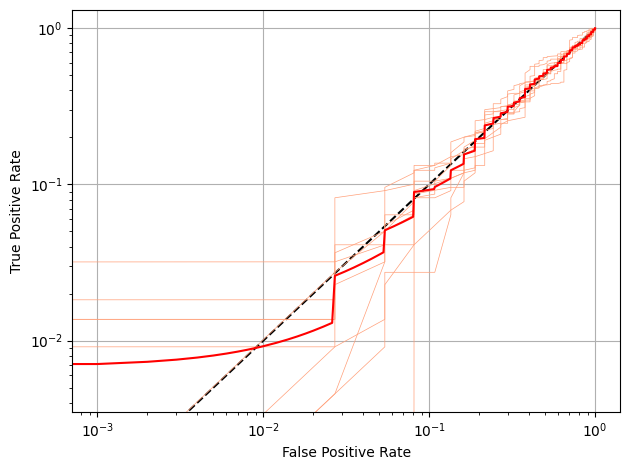

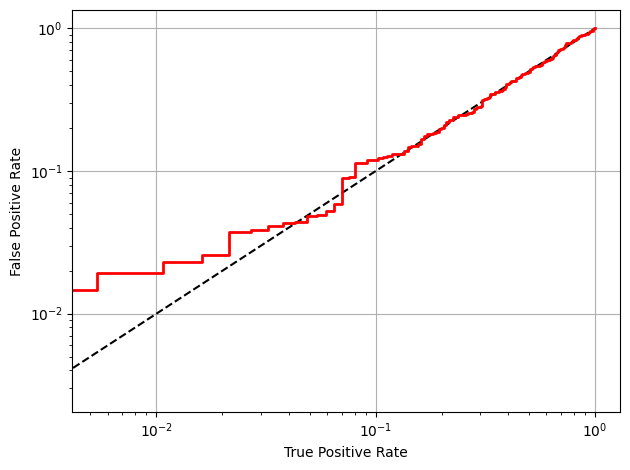

In [71]:
config = {
    'user_story': 3,
    'dataset_filename': 'C:/Users/alieyeh.moghaddam/Desktop/ADNI/synthetic_data_90_56.csv',
    'target_model': "model.pkl",
    'outfile': "summary.txt",
    'attack_results': "attack_results.json",
    'training_artefacts_dir': "./SVM_unsafe_87synth",
    'target_results': "target.json",
    'x_train_path': "x_train.txt",
    'y_train_path': "y_train.txt",
    'x_test_path': "x_test.txt",
    'y_test_path': "y_test.txt",
    'attack_output_name': "attack_output"
}

run_user_story(config)

### Adversarial Robustness Toolbox MI Attack

In [72]:
art_classifier = ScikitlearnSVC(clf)

attack = MembershipInferenceBlackBoxRuleBased(art_classifier)

X_train_scaled = np.loadtxt('x_train.txt')
X_test_scaled = np.loadtxt('x_test.txt')
y_train = np.loadtxt('y_train.txt')
y_test = np.loadtxt('y_test.txt')

# infer attacked feature
inferred_train = attack.infer(X_train_scaled, y_train)
inferred_test = attack.infer(X_test_scaled, y_test)

# check accuracy
train_acc = np.sum(inferred_train) / len(inferred_train)
test_acc = 1 - (np.sum(inferred_test) / len(inferred_test))
acc = (train_acc * len(inferred_train) + test_acc * len(inferred_test)) / (len(inferred_train) + len(inferred_test))
print(f"Members Accuracy: {train_acc:.4f}")
print(f"Non Members Accuracy {test_acc:.4f}")
print(f"Attack Accuracy {acc:.4f}")

Members Accuracy: 0.6481
Non Members Accuracy 0.3978
Attack Accuracy 0.6117


In [73]:
attack_train_ratio = 0.5
attack_train_size = int(len(X_train_scaled) * attack_train_ratio)
attack_test_size = int(len(X_test_scaled) * attack_train_ratio)

bb_attack = MembershipInferenceBlackBox(art_classifier)

# train attack model
bb_attack.fit(X_train_scaled[:attack_train_size], y_train[:attack_train_size],
              X_test_scaled[:attack_test_size], y_test[:attack_test_size])

# get inferred values
inferred_train_bb = bb_attack.infer(X_train_scaled[attack_train_size:], y_train[attack_train_size:])
inferred_test_bb = bb_attack.infer(X_test_scaled[attack_test_size:], y_test[attack_test_size:])

# check accuracy
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
acc = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))
print(f"Members Accuracy: {train_acc:.4f}")
print(f"Non Members Accuracy {test_acc:.4f}")
print(f"Attack Accuracy {acc:.4f}")

Members Accuracy: 1.0000
Non Members Accuracy 0.0000
Attack Accuracy 0.8547


In [74]:
# we run the worst case metric on trainset to find an appropriate threshold
# Black Box
bb_members_test_prob = bb_attack.infer(X_train_scaled[attack_train_size:].astype(np.float32), y_train[attack_train_size:], probabilities=True)
bb_nonmembers_test_prob = bb_attack.infer(X_test_scaled[attack_test_size:].astype(np.float32), y_test[attack_test_size:], probabilities=True)

bb_mia_test_probs = np.concatenate((np.squeeze(bb_members_test_prob, axis=-1),
                               np.squeeze(bb_nonmembers_test_prob, axis=-1)))
                              
bb_mia_test_labels = np.concatenate((np.ones_like(y_train[:attack_train_size]), np.zeros_like(y_test[:attack_test_size])))
# We allow 1% FPR 
fpr, tpr, threshold = get_roc_for_fpr(attack_proba=bb_mia_test_probs, attack_true=bb_mia_test_labels, targeted_fpr=0.01)[0]
print(f'{tpr=}: {fpr=}: {threshold=}')

tpr=0.010968921389396709: fpr=0.0: threshold=0.9033059


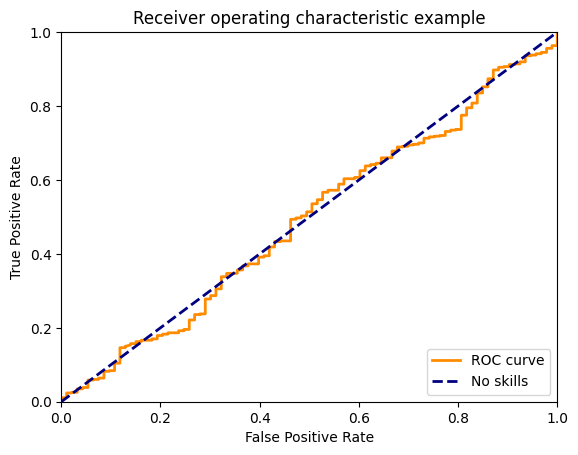

In [75]:
fpr, tpr, _ = roc_curve(y_score=bb_mia_test_probs, y_true=bb_mia_test_labels)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", linewidth =2, label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linewidth =2, linestyle="--", label='No skills')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [75]:
target_labels = np.concatenate((y_train[attack_train_size:], y_test[attack_test_size:]))
results = get_roc_for_fpr(attack_proba=bb_mia_test_probs, attack_true=bb_mia_test_labels, targeted_fpr=0.01, target_model_labels=target_labels)
for v, fpr, tpr, threshold in results:
    print(f'Class {v}: {tpr=:.4f}: {fpr=:.4f}: {threshold=:.4f}')

Class 0.0: tpr=0.0769: fpr=0.0000: threshold=0.8911
Class 1.0: tpr=0.0073: fpr=0.0000: threshold=0.8760
